# Prerequisite

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Moving Data

Now we need to move the zip file of the data from Google Drive to Colab workspace.

In [ ]:
# import these packages first for timing purposes
import time
import glob
import subprocess
import zipfile
import shutil
import os

In [ ]:
def work2drive(drive_folder,work_folder,filename):
  '''Copy a file from the workspace to google drive.'''
  copy_cmd = 'cp /content/%s%s %s%s'%(work_folder,filename,drive_folder,filename)
  print(copy_cmd.split(" "))
  start_t = time.time()
  subprocess.check_output(copy_cmd.split(" "))
  end_t = time.time()
  print("Finished copying files in %.2f s."%(end_t-start_t))

def drive2work(drive_folder,work_folder,filename):
  '''Copy a file from the google drive to workspace.'''
  copy_cmd = 'cp %s%s /content/%s%s'%(drive_folder,filename,work_folder,filename)
  print(copy_cmd.split(" "))
  start_t = time.time()
  subprocess.check_output(copy_cmd.split(" "))
  end_t = time.time()
  print("Finished copying files in %.2f s."%(end_t-start_t))

Move labeled data.

In [ ]:
data_folder = "/content/gdrive/Shareddrives/Zooplankton_ML/Label_Data/"
datafile = "labeled_20220216.zip"
# datafile = "Evadne_Train_20220222.zip"

drive2work(data_folder,"",datafile)

unzip_cmd = 'unzip %s'%(datafile)
start_t = time.time()
subprocess.check_output(unzip_cmd.split(" "))
end_t = time.time()
print("Finished unzipping files in %.2f s."%(end_t-start_t))
!ls

['cp', '/content/gdrive/Shareddrives/Zooplankton_ML/Label_Data/labeled_20220216.zip', '/content/labeled_20220216.zip']
Finished copying files in 1.61 s.
Finished unzipping files in 1.81 s.
Evadne_Train		   gdrive      labeled_20220216.zip
Evadne_Train_20220222.zip  Label_Data  sample_data


Move raw data.

In [ ]:
!mkdir images

data_folder = "/content/gdrive/Shareddrives/Zooplankton_ML/Raw_Data/"
datafile = "raw_20220209_100dates.zip"

drive2work(data_folder,"",datafile)

unzip_cmd = 'unzip %s -d images'%(datafile)
start_t = time.time()
subprocess.check_output(unzip_cmd.split(" "))
end_t = time.time()
print("Finished unzipping files in %.2f s."%(end_t-start_t))
!ls

['cp', '/content/gdrive/Shareddrives/Zooplankton_ML/Raw_Data/raw_20220209_100dates.zip', '/content/raw_20220209_100dates.zip']
Finished copying files in 12.03 s.
Finished unzipping files in 39.51 s.
gdrive	Label_Data	      raw_20220209_100dates.zip
images	labeled_20220210.zip  sample_data


## Data Selection

In some cases, we don't want to train all classes, so we only select classes of interest into a separate folder.

In [ ]:
!mkdir Train_Data

In [ ]:
import shutil

selected_labels = ['Other','Penilia','Larvacean','Lines',
                   'Helix','Rhizarian','Nauplii','Foraminiferan','Echinoderm',
                   'Copepod','Gelatinous']

for label in selected_labels:
  src_name = 'Label_Data/'+label+'/'
  dst_name = 'Train_Data/'+label+'/'
  shutil.copytree(src_name,dst_name)

Merging labels from different folders.

In [ ]:
dst_folder = 'Train_Data/Gelatinous/'

file_list = (glob.glob('Label_Data/Doliolid/*') + glob.glob('Label_Data/Jelly/*')
              +  glob.glob('Label_Data/Eggs/*'))
dst_list = glob.glob(dst_folder+'*')

print('Found %d files in the source folder.'%len(file_list))
print('Found %d files in the destination folder.'%len(dst_list))

for filename in file_list:
  shutil.copy(filename,dst_folder)

dst_list = glob.glob(dst_folder+'*')
print("Finished merging folders.")
print('Found %d files in the destination folder.'%len(dst_list))

Found 366 files in the source folder.
Found 254 files in the destination folder.
Finished merging folders.
Found 620 files in the destination folder.


In [ ]:
dst_folder = 'Train_Data/Rhizarian/'

file_list = glob.glob('Label_Data/Foraminiferan/*') + glob.glob('Label_Data/Echinoderm/*')
dst_list = glob.glob(dst_folder+'*')

print('Found %d files in the source folder.'%len(file_list))
print('Found %d files in the destination folder.'%len(dst_list))

for filename in file_list:
  shutil.copy(filename,dst_folder)

dst_list = glob.glob(dst_folder+'*')
print("Finished merging folders.")
print('Found %d files in the destination folder.'%len(dst_list))

Found 775 files in the source folder.
Found 323 files in the destination folder.
Finished merging folders.
Found 1098 files in the destination folder.


In [ ]:
dst_folder = 'Train_Data/Other/'

file_list = glob.glob('Label_Data/Nauplii/*')
dst_list = glob.glob(dst_folder+'*')

print('Found %d files in the source folder.'%len(file_list))
print('Found %d files in the destination folder.'%len(dst_list))

for filename in file_list:
  shutil.copy(filename,dst_folder)

dst_list = glob.glob(dst_folder+'*')
print("Finished merging folders.")
print('Found %d files in the destination folder.'%len(dst_list))

Found 253 files in the source folder.
Found 1500 files in the destination folder.
Finished merging folders.
Found 1753 files in the destination folder.


In [ ]:
dst_folder = 'Train_Data/Other/'

file_list = glob.glob('Label_Data/Curve/*')
dst_list = glob.glob(dst_folder+'*')

print('Found %d files in the source folder.'%len(file_list))
print('Found %d files in the destination folder.'%len(dst_list))

for filename in file_list:
  shutil.copy(filename,dst_folder)

dst_list = glob.glob(dst_folder+'*')
print("Finished merging folders.")
print('Found %d files in the destination folder.'%len(dst_list))

Found 77 files in the source folder.
Found 1500 files in the destination folder.
Finished merging folders.
Found 1577 files in the destination folder.


Normalize the number of training images in each class.

In [ ]:
!mv Evadne_Train/Evadne Train_Data/
!mv Evadne_Train/EvadneEggs Train_Data/

In [ ]:
folder = 'Train_Data/'
subfolder_list = glob.glob(folder+'*/')
thresh = 1522

for subfolder in subfolder_list:
  im_list = glob.glob(subfolder+'*jpg')
  n_im = len(im_list)
  if n_im > thresh:
    for i in range(n_im-thresh):
      os.remove(im_list[i])

print('Each class has number of labeled images:')
folder_list = glob.glob('Train_Data/*')
for i in range(len(folder_list)):
  dataSet = glob.glob(folder_list[i]+'/*jpg')
  print('%s --> %d images'%(folder_list[i],len(dataSet)))

Each class has number of labeled images:
Train_Data/Nauplii --> 253 images
Train_Data/Helix --> 593 images
Train_Data/Larvacean --> 1190 images
Train_Data/Penilia --> 1522 images
Train_Data/Rhizarian --> 323 images
Train_Data/Copepod --> 1522 images
Train_Data/Evadne --> 1522 images
Train_Data/Curve --> 77 images
Train_Data/Echinoderm --> 191 images
Train_Data/Gelatinous --> 494 images
Train_Data/Other --> 1500 images
Train_Data/Foraminiferan --> 584 images
Train_Data/Lines --> 1522 images
Train_Data/Eggs --> 126 images


# Pytorch Transfer Learning

Import ML Packages

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

Test for GPU capability

In [ ]:
if torch.cuda.is_available():
    print('Default GPU Device: {}'.format(torch.cuda.get_device_name(0)))
else:
    print("No GPU is detected.")

Default GPU Device: Tesla P100-PCIE-16GB


## Data Management

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'Train_Data'
image_datasets = datasets.ImageFolder(data_dir,transform=data_transforms['train'])

train_set_len = int(len(image_datasets)*0.8)
val_set_len = len(image_datasets) - train_set_len
dataset_train, dataset_valid = torch.utils.data.random_split(image_datasets, (train_set_len, 
                                                                              val_set_len))
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, shuffle=True, batch_size=4)
val_loader = torch.utils.data.DataLoader(dataset=dataset_valid, shuffle=False, batch_size=4)
dataloaders = {
    'train':train_loader,
    'val':val_loader
}
dataset_sizes = {
    'train': train_set_len,
    'val': val_set_len
}
# data_dir = 'Label_Data'
# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                           data_transforms[x])
#                   for x in ['train', 'val']}
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
#                                              shuffle=True, num_workers=4)
#               for x in ['train', 'val']}
# dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets.classes
print(len(class_names))
print(class_names)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

13
['Copepod', 'Echinoderm', 'Evadne', 'EvadneEggs', 'Foraminiferan', 'Gelatinous', 'Helix', 'Larvacean', 'Lines', 'Nauplii', 'Other', 'Penilia', 'Rhizarian']


In [ ]:
print('Each class has number of labeled images:')
folder_list = sorted(glob.glob('Train_Data/*'))
for i in range(len(folder_list)):
  dataSet = glob.glob(folder_list[i]+'/*jpg')
  print('%s --> %d images'%(folder_list[i],len(dataSet)))

Each class has number of labeled images:
Train_Data/Copepod --> 1522 images
Train_Data/Echinoderm --> 191 images
Train_Data/Evadne --> 1843 images
Train_Data/EvadneEggs --> 637 images
Train_Data/Foraminiferan --> 584 images
Train_Data/Gelatinous --> 620 images
Train_Data/Helix --> 593 images
Train_Data/Larvacean --> 1190 images
Train_Data/Lines --> 3009 images
Train_Data/Nauplii --> 253 images
Train_Data/Other --> 1577 images
Train_Data/Penilia --> 2271 images
Train_Data/Rhizarian --> 323 images


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # adding array to keep track of loss/accuracy
    # only keep track of valuation set
    loss_vals =  []
    acc_vals = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            if phase == 'val':
              loss_vals.append(epoch_loss)
              acc_vals.append(epoch_acc)

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_vals, acc_vals

## Train with no frozen layers

Here we initialize a model with pretrained weights, but we do not freeze any layers and then train as usual. 

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model_ft, loss_val0, acc_val0 = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 1.3510 Acc: 0.5675
val Loss: 0.9427 Acc: 0.6979

Epoch 1/24
----------
train Loss: 0.9720 Acc: 0.6901
val Loss: 0.7235 Acc: 0.7680

Epoch 2/24
----------
train Loss: 0.8598 Acc: 0.7237
val Loss: 0.6819 Acc: 0.7824

Epoch 3/24
----------
train Loss: 0.7776 Acc: 0.7512
val Loss: 0.6564 Acc: 0.7920

Epoch 4/24
----------
train Loss: 0.7431 Acc: 0.7612
val Loss: 0.7595 Acc: 0.7509

Epoch 5/24
----------
train Loss: 0.6848 Acc: 0.7810
val Loss: 0.7733 Acc: 0.7619

Epoch 6/24
----------
train Loss: 0.6368 Acc: 0.7963
val Loss: 0.9245 Acc: 0.7373

Epoch 7/24
----------
train Loss: 0.5048 Acc: 0.8348
val Loss: 0.4222 Acc: 0.8625

Epoch 8/24
----------
train Loss: 0.4562 Acc: 0.8515
val Loss: 0.4525 Acc: 0.8601

Epoch 9/24
----------
train Loss: 0.4535 Acc: 0.8536
val Loss: 0.4213 Acc: 0.8638

Epoch 10/24
----------
train Loss: 0.4371 Acc: 0.8562
val Loss: 0.4375 Acc: 0.8628

Epoch 11/24
----------
train Loss: 0.4271 Acc: 0.8601
val Loss: 0.4016 Acc: 0.8662

Ep

## Train with frozen layers

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)

n_frozen = 55 # number of frozen layers
i = 0
for param in model_conv.parameters():
  if i<n_frozen:
    param.requires_grad = True
  else:
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

with all frozen layers, max accuray = 71%

In [ ]:
model_conv, loss_val1, acc_val1 = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 1.4988 Acc: 0.5051
val Loss: 1.1937 Acc: 0.6364

Epoch 1/19
----------
train Loss: 1.3322 Acc: 0.5655
val Loss: 1.0636 Acc: 0.6380

Epoch 2/19
----------
train Loss: 1.2894 Acc: 0.5760
val Loss: 0.9733 Acc: 0.6709

Epoch 3/19
----------
train Loss: 1.2754 Acc: 0.5834
val Loss: 0.9497 Acc: 0.6952

Epoch 4/19
----------
train Loss: 1.3013 Acc: 0.5785
val Loss: 1.0133 Acc: 0.6738

Epoch 5/19
----------
train Loss: 1.3134 Acc: 0.5739
val Loss: 1.1304 Acc: 0.6454

Epoch 6/19
----------
train Loss: 1.2789 Acc: 0.5867
val Loss: 0.9644 Acc: 0.6886

Epoch 7/19
----------


KeyboardInterrupt: ignored

## Save and Export Models

In [ ]:
model_filename = 'evadne_eggs_20220222_2C.pth'
torch.save(model_ft, model_filename)

In [ ]:
model_filename = 'pt_20220222_13C.pth'
torch.save(model_ft, model_filename)

In [ ]:
drive_folder = "/content/gdrive/Shareddrives/Zooplankton_ML/Models/"
work2drive(drive_folder,'',model_filename)

['cp', '/content/pt_20220222_13C.pth', '/content/gdrive/Shareddrives/Zooplankton_ML/Models/pt_20220222_13C.pth']
Finished copying files in 0.17 s.


# Model Implementation

In [ ]:
from torch.autograd import Variable
from PIL import Image
import os
import shutil
import time

## Import saved model from Drive

In [ ]:
drive_model_file = "/content/gdrive/Shareddrives/Zooplankton_ML/Models/"
model_filename = 'pt_eightClasses_20220203.pth'
drive2work(drive_model_file,'',model_filename)

['cp', '/content/gdrive/Shareddrives/Zooplankton_ML/Models/pt_eightClasses_20220203.pth', '/content/pt_eightClasses_20220203.pth']
Finished copying files in 1.01 s.


## Prepare model for implementation

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model_ft

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load(model_filename)

In [ ]:
val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [ ]:
def predict_image(image,transform):
  '''image = PIL image,
  transform = Pytorch transform.'''
  image_tensor = transform(image).float()
  image_tensor = image_tensor.unsqueeze_(0)
  input = Variable(image_tensor)
  input = input.to(device)
  output = model(input)
  output_cpu = output.data.cpu()
  index = output_cpu.numpy().argmax()
  probs = torch.nn.functional.softmax(output_cpu, dim=1)
  return index, np.max(probs.numpy())

Exploring how to get prediction confidence

In [ ]:
image_list = glob.glob('images/*jpg')
imname = image_list[0]
image = Image.open(imname)
image_tensor = val_transform(image).float()
image_tensor = image_tensor.unsqueeze_(0)
input = Variable(image_tensor)
input = input.to(device)
output = model(input)

In [ ]:
probs = torch.nn.functional.softmax(output.data.cpu(), dim=1)
np.max(probs.numpy())

0.9959512

## Apply to Training Set

In [ ]:
def applyTestSet(test_folder,output_folder=None):
    start = time.time()
    subfolder_list = sorted(glob.glob(test_folder+'*'))
    n_class = len(subfolder_list)
    print('Found %d classes in the test set.'%n_class)
    # initialize result matrix
    result = np.zeros((n_class,n_class))
    for row in range(n_class):
        print("Inferencing class %d"%row)
        subfolder = subfolder_list[row]
        image_list = glob.glob(subfolder+'/*jpg')
        for image in image_list:
            im = Image.open(image)
            ind,_ = predict_image(im,val_transform)
            # add to the count in the result matrix
            result[row,ind] = result[row,ind]+1

            # save image to output folder
            if output_folder is not None:
                imout_name = (output_folder+'%.2d/'%ind
                        +os.path.basename(image))
                # copy image of desired class to the output folder
                shutil.copy(image,imout_name)
        
        result[row,:] = result[row,:]/len(image_list) # normalize by the number of images in the true class

    end = time.time()
    print("Finish testing in %.2f s"%(end-start))
    return result

def visualizeMatrix(result_matrix,class_names=None):
  # fig=plt.figure(figsize=(10,10))
  fig, ax = plt.subplots(figsize=(10,10))
  im = ax.imshow(result_matrix)

  if class_names is not None:
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(result_matrix)))
    ax.set_xticklabels(class_names)
    ax.set_yticks(np.arange(len(result_matrix)))
    ax.set_yticklabels(class_names)
  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  for i in range(len(result_matrix)):
      for j in range(len(result_matrix)):
          text = ax.text(j, i, '%.2f'%result_matrix[i, j],
                        ha="center", va="center", color="w")

  ax.set_title("Confusion Matrix for Training Data")
  fig.tight_layout()
  plt.show()

In [ ]:
train_set_matrix = applyTestSet('Train_Data/')

Found 14 classes in the test set.
Inferencing class 0
Inferencing class 1
Inferencing class 2
Inferencing class 3
Inferencing class 4
Inferencing class 5
Inferencing class 6
Inferencing class 7
Inferencing class 8
Inferencing class 9
Inferencing class 10
Inferencing class 11
Inferencing class 12
Inferencing class 13
Finish testing in 122.00 s


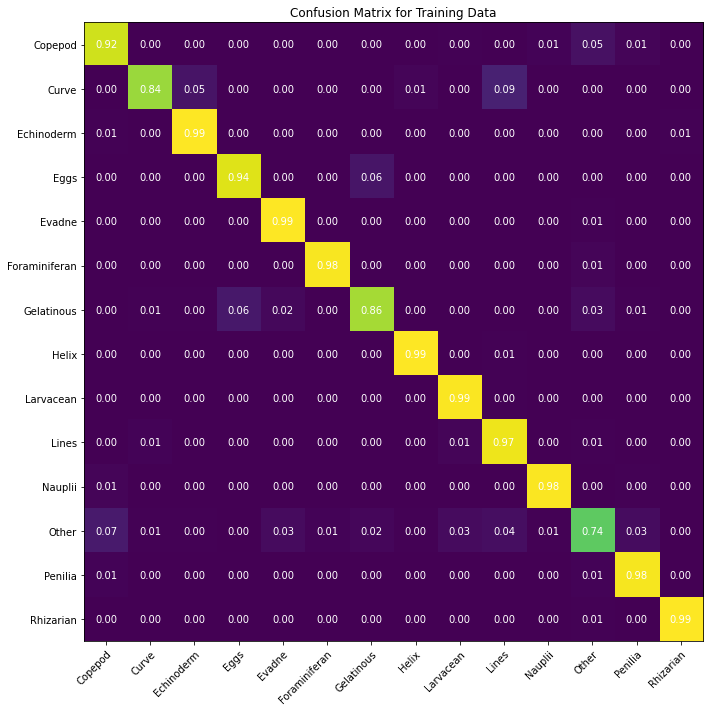

In [ ]:
visualizeMatrix(train_set_matrix,class_names=class_names)

## Inference on new data set

In [ ]:
!rm -r output

In [ ]:
!mkdir output

In [ ]:
#class_labels = ['OtherDS','Penilia','Helix','Larvacean','Lines','Evadne','Doliolids']
n_class=8
#for i in range(len(class_labels)):
for i in range(n_class):
  os.system('mkdir output/%.2d'%i)

In [ ]:
data_folder = '20201010_20201015_images/'
output_folder = 'output/'
image_list = glob.glob(data_folder+'*jpg')
image_num = len(image_list)
print("Found %d images in the data folder."%image_num)

Found 335192 images in the data folder.


In [ ]:
from datetime import datetime,timedelta
import pytz
rate = 144 # images/second
inference_time = image_num/rate

# set timezone
tz = pytz.timezone('America/Los_Angeles')
dt = timedelta(seconds = inference_time)
now = datetime.now(tz)
end = now+dt
end_str = end.strftime("%H:%M")
print("Found %d images in the data folder."%image_num)
print("Expected inference rate is %d images/s"%rate)
print("Expected inference time is %d min"%(inference_time/60))
print("Expected end of inference at %s."%end_str)

Found 335192 images in the data folder.
Expected inference rate is 144 images/s
Expected inference time is 38 min
Expected end of inference at 16:58.


In [ ]:
start = time.time()
print("Inferencing %d images."%image_num)
print("####################")
for i in range(len(image_list)):
  if i%10000==0:
    print("")
    print("Image %d/%d"%(i,image_num))
  if i%500==0:
    print("#",end="")
  im = Image.open(image_list[i])
  ind = predict_image(im,val_transform)
  imout_name = (output_folder+'%.2d/'%ind
                +os.path.basename(image_list[i]))
  # copy image of desired class to the output folder
  shutil.copy(image_list[i],imout_name)
end = time.time()

print("")
print("Finished inferencing %d images in %.2f s."%(i+1,end-start))
print("Average inferencing time = %.3f images/s"%((i+1)/(end-start)))

Inferencing 335192 images.
####################

Image 0/335192
####################
Image 10000/335192
####################
Image 20000/335192
####################
Image 30000/335192
####################
Image 40000/335192
####################
Image 50000/335192
####################
Image 60000/335192
####################
Image 70000/335192
####################
Image 80000/335192
####################
Image 90000/335192
####################
Image 100000/335192
####################
Image 110000/335192
####################
Image 120000/335192
####################
Image 130000/335192
####################
Image 140000/335192
####################
Image 150000/335192
####################
Image 160000/335192
####################
Image 170000/335192
####################
Image 180000/335192
####################
Image 190000/335192
####################
Image 200000/335192
####################
Image 210000/335192
####################
Image 220000/335192
####################
Image 230000/335192
##

In [ ]:
# for i in range(len(class_labels)):
for i in range(n_class):
  folder_name = 'output/%.2d/'%i 
  image_list = glob.glob(folder_name+'*jpg')
  print('%.2d --> %d'%(i,len(image_list)))

00 --> 5907
01 --> 20
02 --> 275
03 --> 2797
04 --> 323180
05 --> 2671
06 --> 299
07 --> 43


## Result Visualization

In [ ]:
subfolder_list = sorted(glob.glob('output/*/'))
print(subfolder_list)

['output/00/', 'output/01/', 'output/02/', 'output/03/', 'output/04/', 'output/05/', 'output/06/', 'output/07/']


In [ ]:
def result_visualization(folder,nim=5):
  '''Visualize results contain in a folder.
  nim = number of images to show per class'''
  subfolder_list = sorted(glob.glob(folder+'*/'))
  for subfolder in subfolder_list:
    # initialize plot forst
    fig=plt.figure(figsize=(10,10))
    # get list of all images in the subfolder
    im_list = glob.glob(subfolder+'*jpg')
    # plot each image in the subplot
    for i in range(nim):
      imname = im_list[i]
      im = Image.open(imname)
      sub = fig.add_subplot(1, nim, i+1)
      plt.axis('off')
      plt.imshow(im)
    # finally display plot
    plt.title(subfolder.split('/')[-2])
    plt.show()

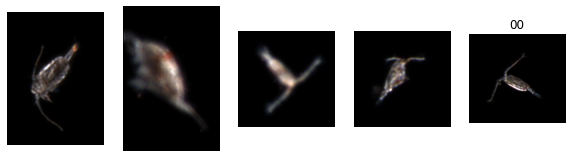

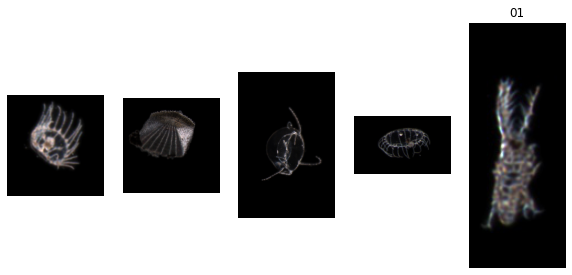

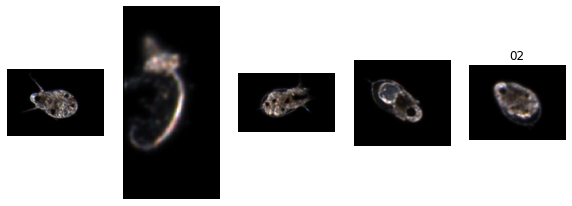

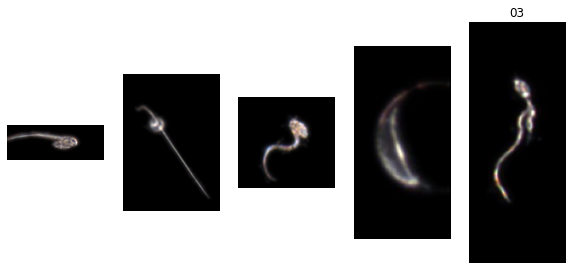

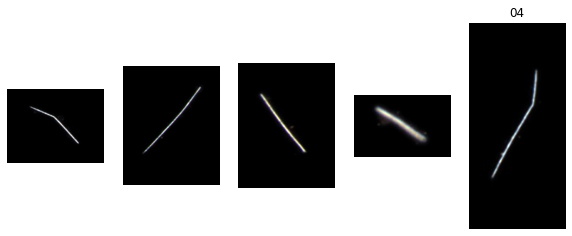

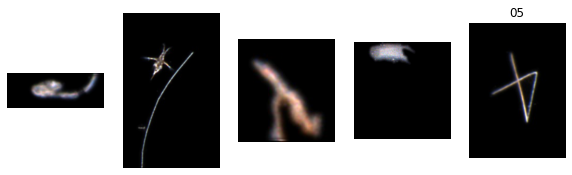

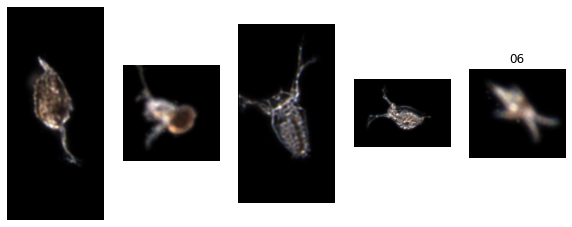

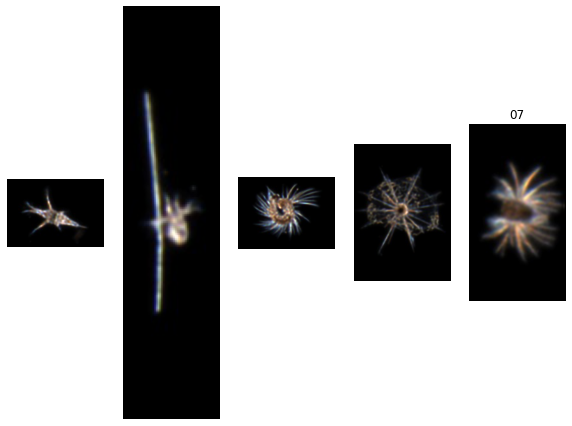

In [ ]:
result_visualization('output/')

## Result Selection and Export

In [ ]:
!mv output/04/ /content/

In [ ]:
!mkdir output/04/

In [ ]:
def randomImages(src,dst,frac):
    file_list = glob.glob(src+'*jpg')
    for filename in file_list:
        if np.random.random_sample()<frac:
            shutil.copy(filename, dst)
    
    print("Finished selecting random files.")
    print("There are %d files in the destination folder."%len(glob.glob(dst+'*jpg')))

Downsampling 'Lines' classes for export.

In [ ]:
src = '04/'
dst = 'output/04/'
randomImages(src,dst,0.01)

Finished selecting random files.
There are 3267 files in the destination folder.


In [ ]:
!zip -r 20201010_20201015_8C_20220206 output

In [ ]:
penilia_list = glob.glob('penilia/*jpg')
print(len(penilia_list))

152


In [ ]:
# !zip -r train_04_penilia.zip penilia
!zip -r 20201007_penilia_02 penilia

In [ ]:
drive_folder = "/content/gdrive/Shareddrives/Zooplankton_ML/Image_Output/"
filename = '20201010_20201015_8C_20220206.zip'
work2drive(drive_folder,'',filename)

['cp', '/content/20201010_20201015_8C_20220206.zip', '/content/gdrive/Shareddrives/Zooplankton_ML/Image_Output/20201010_20201015_8C_20220206.zip']
Finished copying files in 0.39 s.


In [ ]:
drive_folder = "/content/gdrive/Shareddrives/Zooplankton_ML/Image_Output/Iterative_training_20220125/"
filename = 'train_04_penilia.zip'
work2drive(drive_folder,'',filename)

['cp', '/content/train_04_penilia.zip', '/content/gdrive/Shareddrives/Zooplankton_ML/Image_Output/Iterative_training_20220125/train_04_penilia.zip']
Finished copying files in 0.35 s.
